In [1]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('mode.chained_assignment', 'raise')
pl23 = pd.read_csv('Final.csv')
pl23 = pl23.set_index('Team')
print(pl23)

                   Rank  Unnamed: 2  MP  Won  Drawn  Lost  GF  GA  GD  Points
Team                                                                         
Man City              1         NaN  38   28      5     5  94  33  61      89
Arsenal               2         NaN  38   26      6     6  88  43  45      84
Man Utd               3         NaN  38   23      6     9  58  43  15      75
Newcastle             4         NaN  38   19     14     5  68  33  35      71
Liverpool             5         NaN  38   19     10     9  75  47  28      67
Brighton              6         NaN  38   18      8    12  72  53  19      62
Aston Villa           7         NaN  38   18      7    13  51  46   5      61
Spurs                 8         NaN  38   18      6    14  70  63   7      60
Brentford             9         NaN  38   15     14     9  58  46  12      59
Fulham               10         NaN  38   15      7    16  55  53   2      52
Crystal Palace       11         NaN  38   11     12    15  40  4

In [2]:
def generate_centroids(df, k):
    centroids = df.sample(k).reset_index(drop=True)
    return centroids, centroids.values.tolist()

In [3]:
def calculate_distance(df, centroids_coords):
    names = []
    for i, centroid in enumerate(centroids_coords):
        name = f'dist_centroid_{i}'
        df[name] = np.sqrt((df.iloc[:,0] - centroid[0])**2 + (df.iloc[:,1] - centroid[1])**2 + (df.iloc[:,2] - centroid[2])**2)
        names.append(name)
    return df, names

In [4]:
def kmeans(df, xaxis, yaxis, zaxis, k, loops):
    df = df[[xaxis, yaxis, zaxis]].copy()
    df['cluster'] = 0
    centroids, coordinates = generate_centroids(df, k)
    stopIteration = True
    for i in range(loops):
        last_coordinates = coordinates
        df, names = calculate_distance(df, coordinates)
        df['cluster'] = df[names].idxmin(axis=1).str.split('_').str[-1]
        centroids = np.around(df.groupby('cluster')[[xaxis, yaxis, zaxis]].mean(), 4)
        coordinates = centroids.values.tolist()
        if coordinates == last_coordinates and stopIteration:
            break
    print(f'Total Iterations: {i + 1}')
        
    sns.scatterplot(data=centroids, x=xaxis, y=yaxis, color='black', s=150)
    sns.scatterplot(data=df, x=xaxis, y=yaxis, hue='cluster', palette='tab10')
    plt.show()
    return df, centroids

Total Iterations: 3


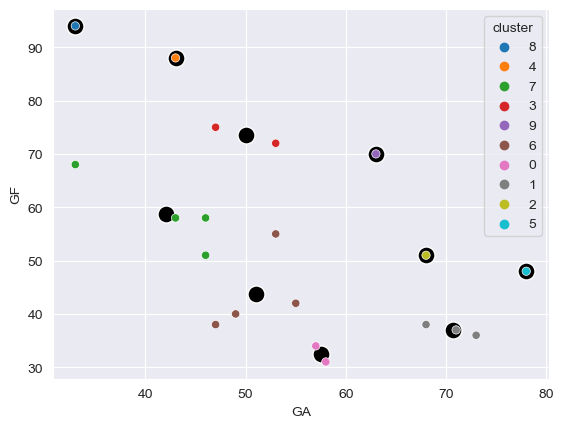

In [13]:
resultdf, centroids = kmeans(pl23, 'GA', 'GF', 'Won', 10, 1000)


In [14]:
resultdf

,GA,GF,Won,cluster,dist_centroid_0,dist_centroid_1,dist_centroid_2,dist_centroid_3,dist_centroid_4,dist_centroid_5,dist_centroid_6,dist_centroid_7,dist_centroid_8,dist_centroid_9
Team,,,,,,,,,,,,,,
Man City,33,94,28,8,68.736817,71.003921,58.608873,28.275431,11.832160,67.690472,55.723088,37.538314,0.000000,39.698866
Arsenal,43,88,26,4,59.688776,60.554848,47.780749,17.762320,0.000000,56.444663,47.096311,30.151700,11.832160,28.071338
Man Utd,43,58,23,7,32.291640,37.575122,29.495762,17.592612,30.149627,39.761791,19.699302,4.430011,37.696154,23.853721
Newcastle,33,68,19,7,44.167296,49.865393,40.174619,17.874563,23.430749,50.685304,31.001008,12.908331,27.513633,30.083218
Liverpool,47,75,19,3,44.796763,45.944421,33.421550,3.391165,15.297059,42.825226,32.273247,17.003676,25.258662,16.792856
Brighton,53,72,18,3,40.654028,40.301647,27.331301,3.391165,20.493902,36.359318,28.949309,17.237314,31.368774,10.198039
Aston Villa,46,51,18,7,23.382686,29.858945,23.769729,22.858259,37.973675,33.970576,10.656571,8.753571,46.021734,25.495098
Spurs,63,70,18,9,38.842631,35.140984,21.610183,13.472194,28.071338,28.809721,29.479866,23.835373,39.698866,0.000000
Brentford,46,58,15,7,28.508771,33.008435,23.853721,16.385970,32.093613,34.467376,15.396834,5.533986,40.422766,21.023796


In [15]:
sns.set_style("darkgrid")
mean_plot = 3
num = 40

In [16]:
x1 = resultdf['GA']#np.random.normal (mean_plot, 1, size = num)
y1 = resultdf['GF']#np.random.normal (mean_plot, 1, size = num)
z1 = resultdf['Won']#np.random.normal (mean_plot, 1, size = num)
clr = resultdf['cluster'].astype(int)
print(type(clr))

<class 'pandas.core.series.Series'>


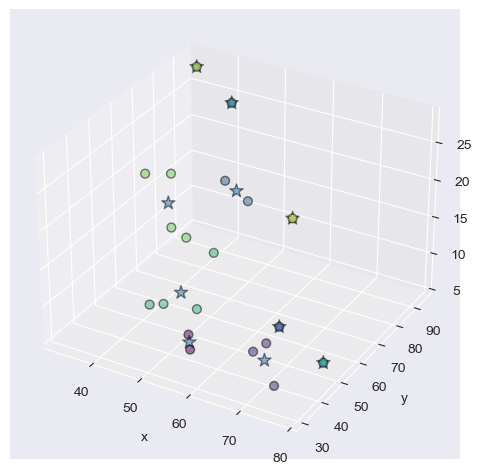

In [17]:
# plt.figure(figsize = (10, 10))
plot_axes = plt.axes(projection = '3d')
plot_axes.scatter3D(x1, y1, z1, c=clr, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)
plot_axes.set_xlabel('x')
plot_axes.set_ylabel('y')
plot_axes.set_zlabel('z')
plot_axes.scatter3D(centroids['GA'], centroids['GF'], centroids['Won'],
            edgecolor='k', s=100, alpha = 0.5, marker='*')
plt.tight_layout()
plt.show()